In [3]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import json

In [5]:
from Preprocessing.data_keys import get_decade, get_player_type_by_key, get_country_by_key

In [6]:
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [7]:
actives,non_actives = 0,0
in_mayors,in_negro_league,in_negro_and_mlb = 0,0,0

plus_than_2_years,plus_than_4_years,plus_than_6_years,plus_than_9_years = 0,0,0,0

as_player_hof, hof_type, hof_number_of_seasons = 0, {}, {}

hof_nationality, all_players_nationality= {},{}

induction_year, induction_decade_dic = {}, {}
induction_decade_list, retirament_decade_list = [], []

hall_players_type, all_players_type = {1:0,2:0}, {1:0,2:0}

two_way_all, two_way_hall = 0, 0

hall_player_number_of_games = {}
hall_player_pitchers_number_of_games, hall_player_batters_number_of_games = {},{}
batter_in_hall,pitcher_in_hall= {},{}

all_batters, all_pitchers = {},{}

for p_id in players_mlb.keys():
    player = players_mlb[p_id]
    if player["Active"]:
        actives +=1
    else:
        non_actives+=1
    p_t = player["Player type"]
    all_players_type[p_t]+=1
    if p_t == 1:
        all_pitchers[p_id] = player
    elif p_t == 2:
        b_stats = player['batter_stats']
        if len(b_stats) != 0:
            all_batters[p_id] = player
    if player['play_in_mayors']:
        in_mayors+=1
    if player['play_in_negro_league']:
        in_negro_league+=1
        if player['play_in_mayors']:
            in_negro_and_mlb+=1
    if player['two_way_player']:
        two_way_all+=1
    if all_players_nationality.get(player['Country']) == None:
        all_players_nationality[player['Country']] = 1
    else:
        all_players_nationality[player['Country']]+=1
    total_seasons = int(player["total_seasons"])
    if total_seasons > 9:
        plus_than_9_years+=1
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons > 6:
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>4:
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>2:
        plus_than_2_years+=1
    if player["HoF"] == 1:       
        h_type = player["HoF type"].lower()
        if 'player' == h_type:
            player_type = player["Player type"]
            hall_players_type[player_type]+=1
            if player['two_way_player']:
                two_way_hall+=1
            if hof_nationality.get(player['Country']) == None:
                hof_nationality[player['Country']] = 1
            else:
                hof_nationality[player['Country']]+=1
            as_player_hof +=1
            if hof_number_of_seasons.get(total_seasons)==None:
                hof_number_of_seasons[total_seasons] = 1
            else:
                hof_number_of_seasons[total_seasons] += 1
            i_year = int(player["HoF year"])
            if induction_year.get(i_year) == None:
                induction_year[i_year] = 1
            else:
                induction_year[i_year] +=1
            i_decade = get_decade(i_year)
            if induction_decade_dic.get(i_decade) == None:
                induction_decade_dic[i_decade] = 1
            else:
                induction_decade_dic[i_decade] += 1
            induction_decade_list.append(i_decade)
            r_decade = get_decade(int(player["Last year"]))
            retirament_decade_list.append(r_decade)
            games = 0
            if player_type == 1: #P
                pitcher_in_hall[player['Id']] = player
                games = player['pitcher_stats']['G']['summary']
                if hall_player_pitchers_number_of_games.get(games) == None:
                    hall_player_pitchers_number_of_games[games] = 1
                else:
                    hall_player_pitchers_number_of_games[games]+=1
            elif player_type == 2: #B
                batter_in_hall[player['Id']] = player
                games = player['batter_stats']['G']['summary']
                if hall_player_batters_number_of_games.get(games) == None:
                    hall_player_batters_number_of_games[games] = 1
                else:
                    hall_player_batters_number_of_games[games]+=1
            if hall_player_number_of_games.get(games) == None:
                hall_player_number_of_games[games] = 1
            else:
                hall_player_number_of_games[games]+=1
        if hof_type.get(h_type) == None:
            hof_type[h_type] = 1
        else:
            hof_type[h_type]+=1
        

In [8]:
print(f"{plus_than_2_years}-->{plus_than_4_years}-->{plus_than_6_years}-->{plus_than_9_years}")


12735-->8840-->6360-->3788


In [9]:
from pprint import pprint
pprint(induction_decade_dic)

{1930: 16,
 1940: 29,
 1950: 21,
 1960: 26,
 1970: 45,
 1980: 30,
 1990: 30,
 2000: 33,
 2010: 30,
 2020: 8}


In [10]:
pprint(hall_players_type)

{1: 72, 2: 196}


In [11]:
pprint(all_players_type)

{1: 9707, 2: 12975}


In [12]:
##Proportion hof for type of player
for t in hall_players_type.keys():
    print(f"{get_player_type_by_key(t)} : {(hall_players_type[t]/all_players_type[t])*100}")
print(f"Two-way : {round((two_way_hall/two_way_all)*100,2)}")

Pitcher : 0.7417327701658597
Batter : 1.510597302504817
Two-way : 8.55


In [13]:
##Proportion for nationality
total_players = len(players_mlb.keys())
for t in hof_nationality.keys():
    mlb = all_players_nationality[t]
    hof = hof_nationality[t]
    print(f"{t}: in mlb {mlb} in hall {hof}  {round((hof/mlb)*100,2)}%")

us: in mlb 18766 in hall 248  1.32%
ve: in mlb 448 in hall 1  0.22%
pr: in mlb 302 in hall 4  1.32%
nl: in mlb 11 in hall 1  9.09%
pa: in mlb 78 in hall 2  2.56%
cu: in mlb 380 in hall 6  1.58%
do: in mlb 845 in hall 4  0.47%
ca: in mlb 259 in hall 2  0.77%


In [14]:
pprint(hof_nationality)

{'ca': 2, 'cu': 6, 'do': 4, 'nl': 1, 'pa': 2, 'pr': 4, 'us': 248, 've': 1}


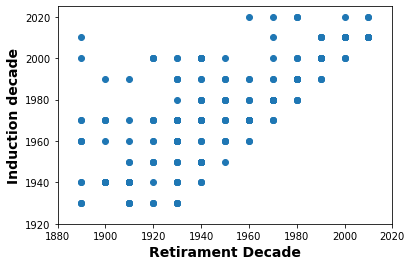

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=retirament_decade_list, y =induction_decade_list)
ax.set_xlabel("Retirament Decade", fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_ylim([1920,2025])
ax.set_xlim([1880, 2020])
ax.set_ylabel("Induction decade", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.show()

In [16]:
print(f"In mayors:{in_mayors}")
print(f"In negro Leagues:{in_negro_league}")
print(f"In negro league and mayors:{in_negro_and_mlb}")

In mayors:20399
In negro Leagues:2432
In negro league and mayors:153


In [17]:
as_player_hof

268

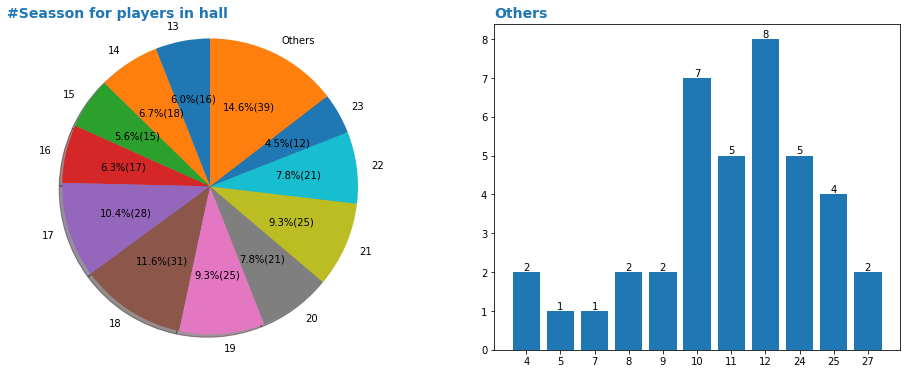

In [18]:
##pprint(hof_number_of_seasons)

others= [str(x) for x in [4,5,7,8,9,10,11,12,24,25,27]]
other_count = [2,1,1,2,2,7,5,8,5,4,2]

p_count =  [16,18,15,17,28,31,25,21,25,21,12,39]
p_labels = [13,14,15,16,17,18,19,20,21,22,23,"Others"]

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%({next(gen)})"

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))
ax1.pie(p_count, labels=p_labels, autopct=autopct_fun(p_count), shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('#Seasson for players in hall', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax2.bar(others, other_count, color='blue')
x = np.arange(len(other_count))
ax2.bar_label(ax2.bar(x, other_count))
ax2.set_title('Others', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()


In [19]:
def boxplot_data_from_dict(dict):   
    n = []
    for d in dict:
        n.extend([d]*dict[d])
    return n


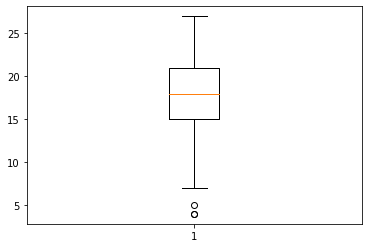

In [20]:
# NUmbre of seasson HoF players
fig,ax = plt.subplots()
ax.boxplot(boxplot_data_from_dict(hof_number_of_seasons))
plt.show()

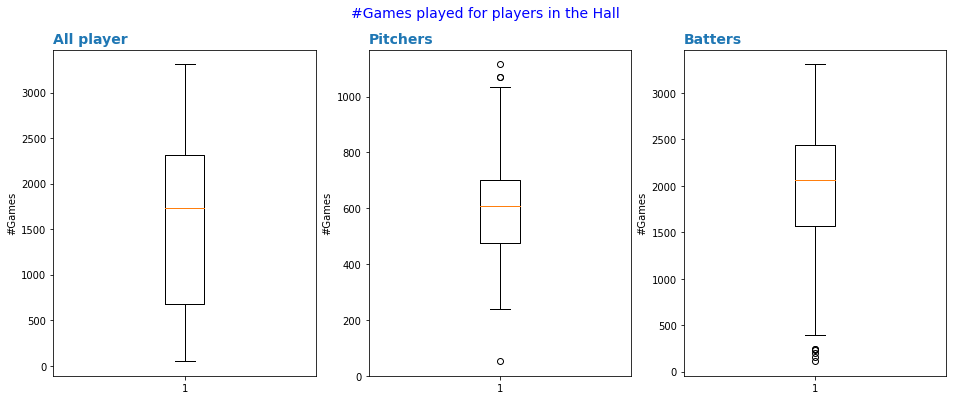

In [21]:
#number of games
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 6))
ax1.boxplot(boxplot_data_from_dict(hall_player_number_of_games))
ax1.set_title('All player', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax1.set_ylabel("#Games")

ax2.boxplot(boxplot_data_from_dict(hall_player_pitchers_number_of_games))
ax2.set_title('Pitchers', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax2.set_ylabel("#Games")

ax3.boxplot(boxplot_data_from_dict(hall_player_batters_number_of_games))
ax3.set_title('Batters', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax3.set_ylabel("#Games")

fig.suptitle("#Games played for players in the Hall", size=14, color='blue')

plt.show()

In [22]:
def batter_seasson_avg_Calc(stat, games, seasson_factor=164,r=0):
    player_factor = games/seasson_factor
    return round((stat/player_factor),r)

def pitcher_seasson_avg_Calc(stat, games_plus_games_started, seasson_factor=68,r=0):
    player_factor = games_plus_games_started/seasson_factor
    return round((stat/player_factor),r)
